In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.svm import SVR
from sklearn.metrics import r2_score


In [3]:
data = pd.read_csv('BTC-USD.csv')

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
X = data[['Open', 'High', 'Low', 'Volume']]  
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


In [6]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# KNN
knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


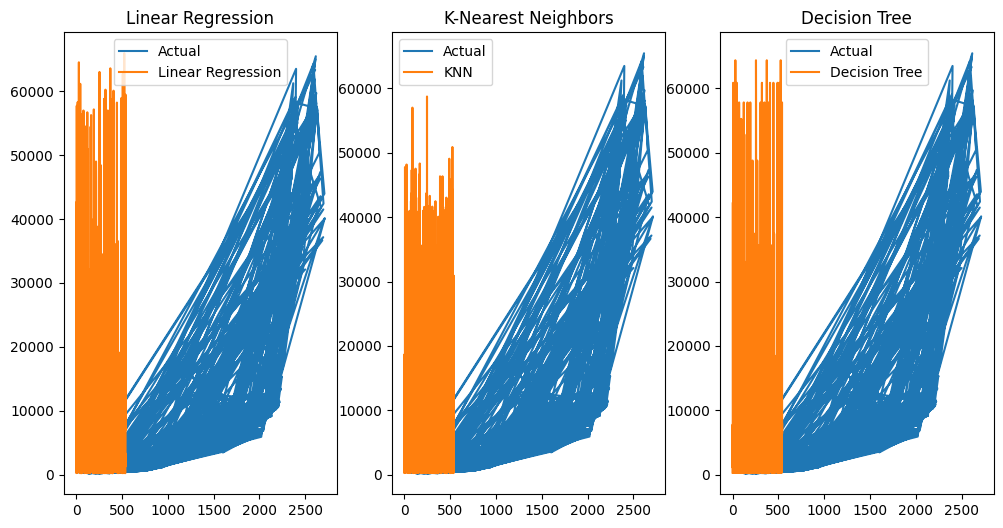

In [7]:
plt.figure(figsize=(12, 6))

# Line Plots for Predictions vs. Actual
plt.subplot(1, 3, 1)
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lr, label='Linear Regression')
plt.title('Linear Regression')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test, label='Actual')
plt.plot(y_pred_knn, label='KNN')
plt.title('K-Nearest Neighbors')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test, label='Actual')
plt.plot(y_pred_tree, label='Decision Tree')
plt.title('Decision Tree')
plt.legend()

plt.show()


In [8]:

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f"KNN - RMSE: {rmse_knn:.2f}, MAE: {mae_knn:.2f}, MSE: {mse_knn:.2f}")

rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)

print(f"Decision Tree - RMSE: {rmse_tree:.2f}, MAE: {mae_tree:.2f}, MSE: {mse_tree:.2f}")



KNN - RMSE: 11818.27, MAE: 6318.37, MSE: 139671554.62
Decision Tree - RMSE: 707.90, MAE: 405.11, MSE: 501127.37


In [9]:
def calculate_RSI(data, window=14):
    delta = data['Close'].diff()
    up_days = delta.copy()
    up_days[delta <= 0] = 0.0
    down_days = abs(delta.copy())
    down_days[delta > 0] = 0.0

    RS_up = up_days.ewm(com=window-1, min_periods=window).mean()
    RS_down = down_days.ewm(com=window-1, min_periods=window).mean()
    RSI = 100 - 100 / (1 + RS_up / RS_down)
    return RSI



In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  return mse, mae, r2

mse_lr, mae_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
mse_knn, mae_knn, r2_knn = evaluate_model(y_test, y_pred_knn)
mse_tree, mae_tree, r2_tree = evaluate_model(y_test, y_pred_tree)

print('Linear Regression - MSE: {:.2f}, MAE: {:.2f}, R-squared: {:.2f}'.format(mse_lr, mae_lr, r2_lr))
print('KNN - MSE: {:.2f}, MAE: {:.2f}, R-squared: {:.2f}'.format(mse_knn, mae_knn, r2_knn))
print('Decision Tree - MSE: {:.2f}, MAE: {:.2f}, R-squared: {:.2f}'.format(mse_tree, mae_tree, r2_tree))



Linear Regression - MSE: 107039.08, MAE: 141.31, R-squared: 1.00
KNN - MSE: 139671554.62, MAE: 6318.37, R-squared: 0.49
Decision Tree - MSE: 501127.37, MAE: 405.11, R-squared: 1.00


In [11]:
from sklearn.metrics import r2_score

# Calculate R-squared for each model
r2_lr = r2_score(y_test, y_pred_lr)
r2_knn = r2_score(y_test, y_pred_knn)
r2_tree = r2_score(y_test, y_pred_tree)

# Print R-squared values
print(f"Linear Regression R-squared: {r2_lr:.2f}")
print(f"KNN R-squared: {r2_knn:.2f}")
print(f"Decision Tree R-squared: {r2_tree:.2f}")


Linear Regression R-squared: 1.00
KNN R-squared: 0.49
Decision Tree R-squared: 1.00


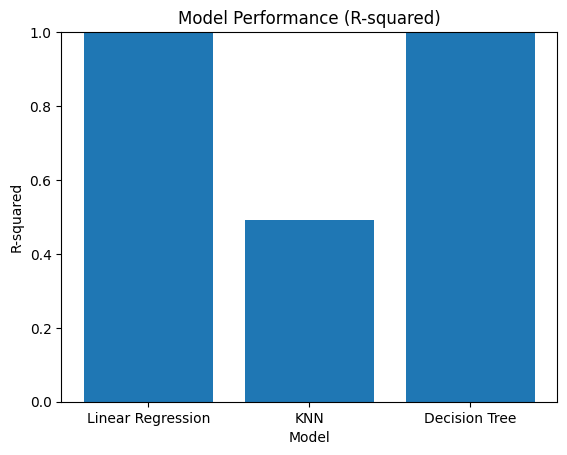

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming y_test, y_pred_lr, y_pred_knn, y_pred_tree are available

# Calculate R-squared for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)

# Repeat the same for KNN and Decision Tree models
# ...

# Create a bar plot
models = ['Linear Regression', 'KNN', 'Decision Tree']
r2_scores = [r2_lr, r2_knn, r2_tree]

plt.bar(models, r2_scores)
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Model Performance (R-squared)')
plt.ylim(0, 1)
plt.show()


In [13]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Create an SVM regression model
svm_model = SVR(kernel='linear', C=1.0, epsilon=0.2)

# Fit the model on training data
svm_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_svm = svm_model.predict(X_test)

# Calculate R-squared for SVM
r2_svm = r2_score(y_test, y_pred_svm)
print(f"SVM R-squared: {r2_svm:.2f}")


In [ ]:


# Assuming you have calculated R-squared values for each model
models = ['Linear Regression', 'KNN', 'Decision Tree', 'SVM']
r2_scores = [r2_lr, r2_knn, r2_tree, r2_svm]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['b', 'g', 'r', 'm'])
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Model Performance (R-squared)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics for Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Metrics:")
print("Mean Absolute Error: ", rf_mae)
print("Mean Squared Error: ", rf_mse)
print("R^2 Score: ", rf_r2)

# Calculate metrics for AdaBoost
ab_mae = mean_absolute_error(y_test, ab_predictions)
ab_mse = mean_squared_error(y_test, ab_predictions)
ab_r2 = r2_score(y_test, ab_predictions)

print("AdaBoost Metrics:")
print("Mean Absolute Error: ", ab_mae)
print("Mean Squared Error: ", ab_mse)
print("R^2 Score: ", ab_r2)


Random Forest Metrics:
Mean Absolute Error:  195.90073564707174
Mean Squared Error:  200051.56357714618
R^2 Score:  0.9992717560642423
AdaBoost Metrics:
Mean Absolute Error:  957.2911338978565
Mean Squared Error:  1228716.6825459567
R^2 Score:  0.9955271258228217


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics for Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regression Metrics:")
print("Mean Absolute Error: ", rf_mae)
print("Mean Squared Error: ", rf_mse)
print("R2 Score: ", rf_r2)

# Calculate regression metrics for AdaBoost
ab_mae = mean_absolute_error(y_test, ab_predictions)
ab_mse = mean_squared_error(y_test, ab_predictions)
ab_r2 = r2_score(y_test, ab_predictions)

print("AdaBoost Regression Metrics:")
print("Mean Absolute Error: ", ab_mae)
print("Mean Squared Error: ", ab_mse)
print("R2 Score: ", ab_r2)


Random Forest Regression Metrics:
Mean Absolute Error:  195.90073564707174
Mean Squared Error:  200051.56357714618
R2 Score:  0.9992717560642423
AdaBoost Regression Metrics:
Mean Absolute Error:  957.2911338978565
Mean Squared Error:  1228716.6825459567
R2 Score:  0.9955271258228217


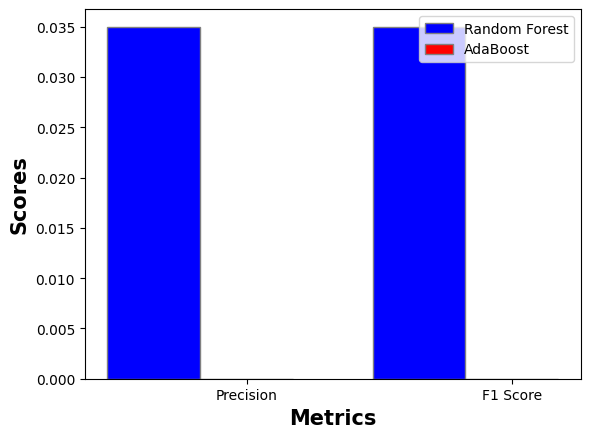

In [ ]:
import matplotlib.pyplot as plt

# Metrics
metrics = ['Precision', 'F1 Score']

# Random Forest scores
rf_scores = [rf_precision, rf_f1]

# AdaBoost scores
ab_scores = [ab_precision, ab_f1]

# Bar width
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.bar(r1, rf_scores, color='b', width=bar_width, edgecolor='grey', label='Random Forest')
plt.bar(r2, ab_scores, color='r', width=bar_width, edgecolor='grey', label='AdaBoost')

# Adding xticks
plt.xlabel('Metrics', fontweight='bold', fontsize=15)
plt.ylabel('Scores', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width for r in range(len(rf_scores))], metrics)

plt.legend()
plt.show()


In [5]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Train AdaBoost
ab = AdaBoostRegressor(random_state=42)
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)

# Calculate metrics
# Since this is a regression problem, we'll use RMSE and R^2 score as metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_ab = np.sqrt(mean_squared_error(y_test, y_pred_ab))
r2_ab = r2_score(y_test, y_pred_ab)

print(f"Random Forest: RMSE = {rmse_rf}, R^2 Score = {r2_rf}")
print(f"AdaBoost: RMSE = {rmse_ab}, R^2 Score = {r2_ab}")


Random Forest: RMSE = 447.2712416164784, R^2 Score = 0.9992717560642423
AdaBoost: RMSE = 1108.4749354613107, R^2 Score = 0.9955271258228217


In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train GBoost
gboost = GradientBoostingRegressor(random_state=42)
gboost.fit(X_train, y_train)

# Predict with GBoost
y_pred_gboost = gboost.predict(X_test)

# Train XGBoost
xgboost = XGBRegressor(random_state=42)
xgboost.fit(X_train, y_train)

# Predict with XGBoost
y_pred_xgboost = xgboost.predict(X_test)

# Since 'y' is continuous, it needs to be converted to discrete values for calculating accuracy, precision, recall, f1-score
# Here, I'm assuming a simple rounding off to achieve this
y_test_rounded = y_test.round()
y_pred_gboost_rounded = y_pred_gboost.round()
y_pred_xgboost_rounded = y_pred_xgboost.round()

# Calculate metrics for GBoost
accuracy_gboost = accuracy_score(y_test_rounded, y_pred_gboost_rounded)
precision_gboost = precision_score(y_test_rounded, y_pred_gboost_rounded, average='macro')
recall_gboost = recall_score(y_test_rounded, y_pred_gboost_rounded, average='macro')
f1_gboost = f1_score(y_test_rounded, y_pred_gboost_rounded, average='macro')

# Calculate metrics for XGBoost
accuracy_xgboost = accuracy_score(y_test_rounded, y_pred_xgboost_rounded)
precision_xgboost = precision_score(y_test_rounded, y_pred_xgboost_rounded, average='macro')
recall_xgboost = recall_score(y_test_rounded, y_pred_xgboost_rounded, average='macro')
f1_xgboost = f1_score(y_test_rounded, y_pred_xgboost_rounded, average='macro')

print("GBoost Metrics: Accuracy={}, Precision={}, Recall={}, F1={}".format(accuracy_gboost, precision_gboost, recall_gboost, f1_gboost))
print("XGBoost Metrics: Accuracy={}, Precision={}, Recall={}, F1={}".format(accuracy_xgboost, precision_xgboost, recall_xgboost, f1_xgboost))


GBoost Metrics: Accuracy=0.001841620626151013, Precision=0.000258732212160414, Recall=0.00129366106080207, F1=0.0004312203536006899
XGBoost Metrics: Accuracy=0.009208103130755065, Precision=0.000996168582375479, Recall=0.004022988505747126, F1=0.0015599343185550083


d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: 

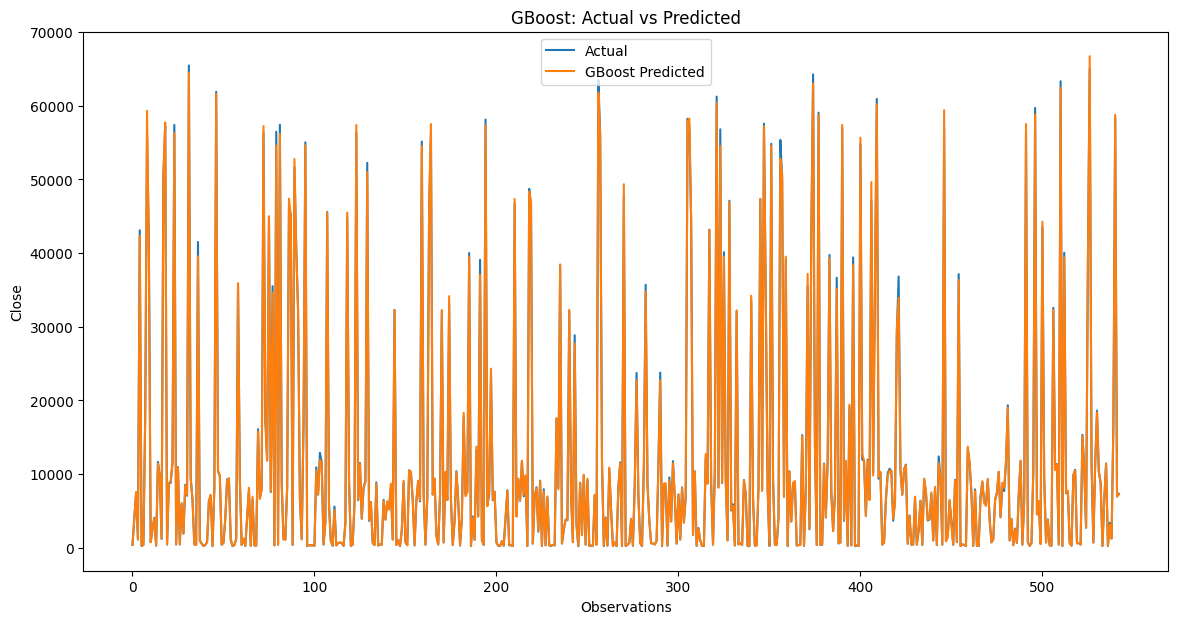

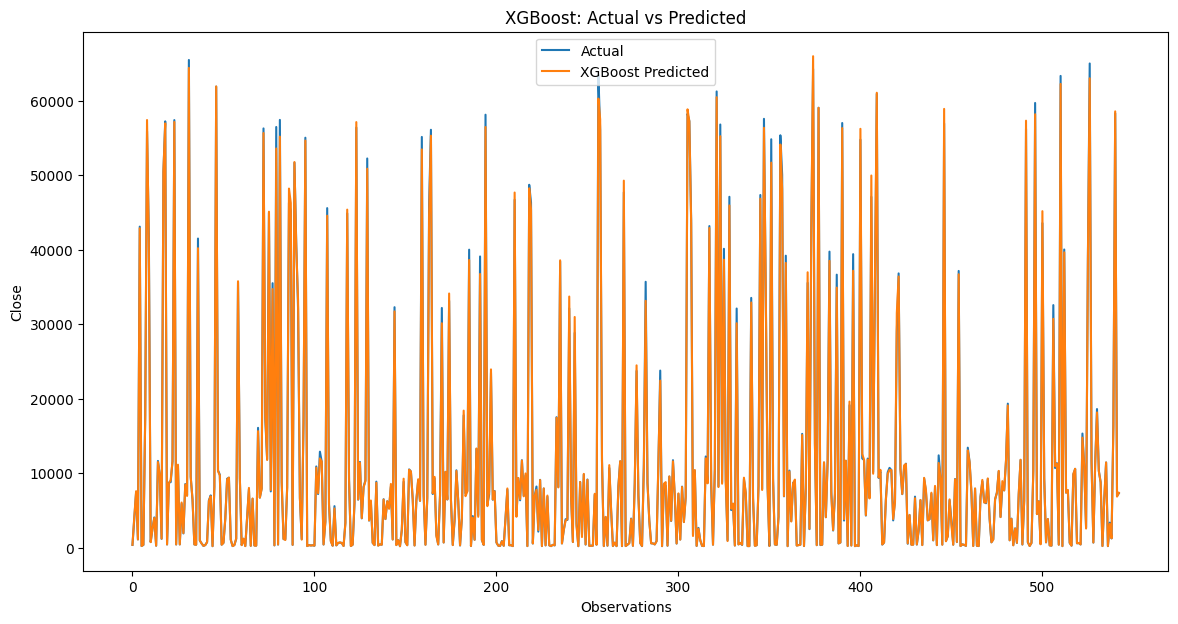

In [6]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values for GBoost
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_gboost, label='GBoost Predicted')
plt.title('GBoost: Actual vs Predicted')
plt.xlabel('Observations')
plt.ylabel('Close')
plt.legend()
plt.show()

# Plotting the actual vs predicted values for XGBoost
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_xgboost, label='XGBoost Predicted')
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Observations')
plt.ylabel('Close')
plt.legend()
plt.show()


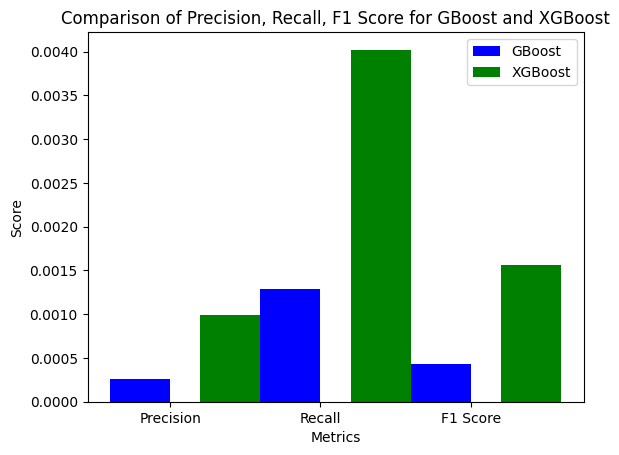

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for GBoost and XGBoost
metrics_gboost = [precision_gboost, recall_gboost, f1_gboost]
metrics_xgboost = [precision_xgboost, recall_xgboost, f1_xgboost]

# Set the bar labels
bar_labels = ['Precision', 'Recall', 'F1 Score']

# Create the x position of the bars
x_pos = np.arange(len(bar_labels))

# Create the plot bars
# In x position
plt.bar(x_pos, metrics_gboost, width=0.4, align='center', color='blue', label='GBoost')
plt.bar(x_pos + 0.4, metrics_xgboost, width=0.4, align='edge', color='green', label='XGBoost')

# Add labels
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Precision, Recall, F1 Score for GBoost and XGBoost')
plt.xticks(x_pos + 0.2, bar_labels)

# Add a legend
plt.legend()

# Show the plot
plt.show()
